#**Import Libraries and Dataset**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr

In [16]:
df=pd.read_csv('seeds.csv')
df

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,Canadian
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,Canadian
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,Canadian
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,Canadian


# **Data Cleaning & EDA**

In [13]:
df.isnull().sum()

Area               0
Perimeter          0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64

In [18]:
# Convert Type Column to from str to int
conv_type = {'Kama':1, 'Rosa':2, 'Canadian':3}

df_new = df['Type']

df_new = [conv_type[item] for item in df_new]
print(df_new)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [21]:
# Using Pearson Correlation to see the correlation strength between features and types
for item in df:
  if not(item in ['Type']):
    item2 = 'Type'
    corr, _ = pearsonr(df[item], df_new)
    print(f'{item} vs {item2} = {abs(corr)}')

Area vs Type = 0.34066440376649426
Perimeter vs Type = 0.32222334204648767
Compactness vs Type = 0.5392607066691073
Kernel.Length vs Type = 0.24942191864415708
Kernel.Width vs Type = 0.4219607276403787
Asymmetry.Coeff vs Type = 0.5739561120423798
Kernel.Groove vs Type = 0.03550825619701445


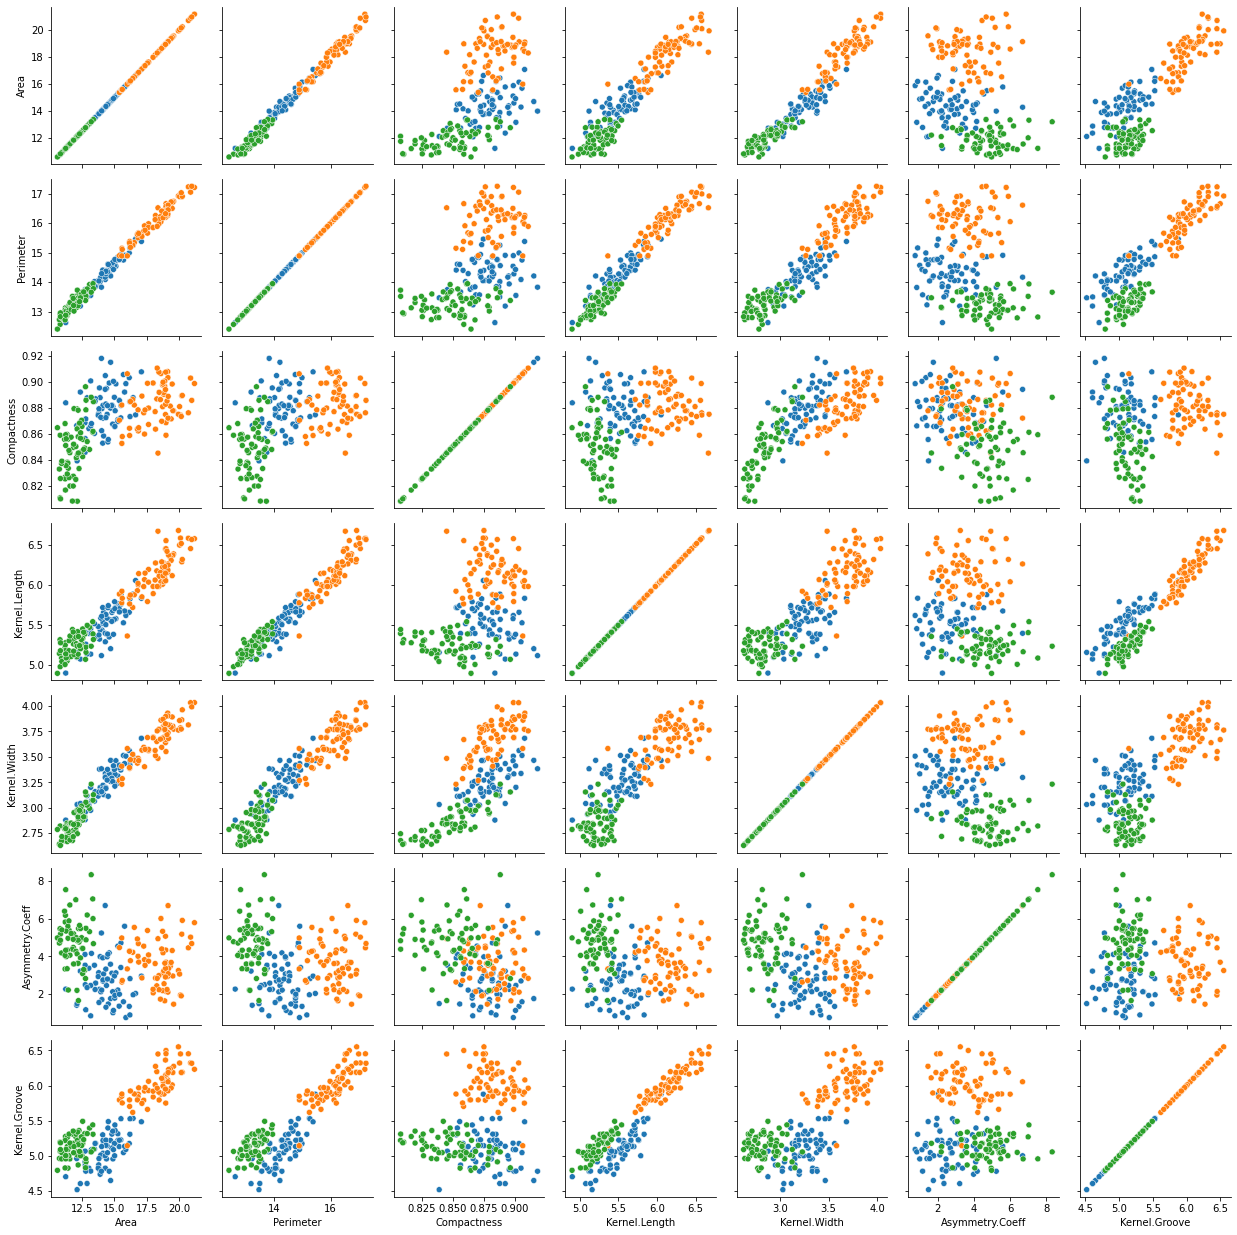

In [24]:
# Show comparisons between all features with one another, using Type as hue to show class separation within plots.
g = sns.PairGrid(df, hue = "Type")
g.map(sns.scatterplot)

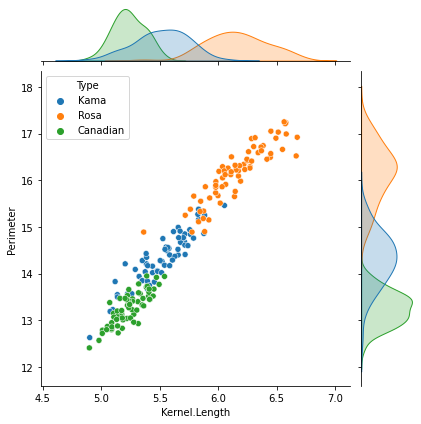

In [25]:
# Plot jointplot to see distribution of Types within 2 feature comparisons
sns.jointplot(x='Kernel.Length',y='Perimeter',data= df, hue='Type')

In [26]:
df

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,Canadian
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,Canadian
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,Canadian
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,Canadian


#**Model Comparisons**

In [27]:
# Independent and Dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [28]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [30]:
# Import ML models to explore: Randon Forest, Decision Tree, KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score # This returns the cross validation score of a model based on the number of Stratified KFolds

In [31]:
# Created Decision Tree instance to change hyper parameter
tree = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=10)

In [32]:
# Created Random Forest instance to change hyper parameter
rf = RandomForestClassifier(n_estimators=100)

In [33]:
# Created KNN instance to change hyper parameter
knn = KNeighborsClassifier(n_neighbors=9)

In [34]:
a = cross_val_score(tree, X, y,cv=10)
print(a,a.mean())


[0.85       0.95       0.85       0.85       0.95       0.95
 1.         0.95       0.8        0.78947368] 0.8939473684210526


In [35]:
# Get Cross validation score of Random Forest instance and the average score(SKF = 10) 
b = cross_val_score(rf, X, y,cv=10)
print(b,b.mean())

[0.85       0.95       0.95       0.9        1.         0.95
 1.         0.95       0.65       0.78947368] 0.8989473684210525


In [36]:
# Get Cross validation score of KNN instance and the average score(SKF = 10) 
c = cross_val_score(knn, X, y,cv=10)
print(c,c.mean())

[1.         1.         0.9        1.         0.9        0.8
 1.         0.95       0.85       0.73684211] 0.9136842105263158


#**Create/Train/Test KNN Classifier Model** 

In [37]:
# Implement Random Forest classifier
Wheatclassifier=knn
Wheatclassifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [38]:
# Prediction
y_pred=Wheatclassifier.predict(X_test)

In [39]:
# Check Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [40]:
score

0.9166666666666666

In [41]:
import pickle
pickle_out = open("Wheatclassifier.pkl", "wb")
pickle.dump(Wheatclassifier, pickle_out)
pickle_out.close()

image.png

In [42]:
Wheatclassifier.predict([[12.72, 13.57,0.86,5.22,3.04,4.10,4.9]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['Canadian'], dtype=object)

image.png

image.png

In [43]:
Wheatclassifier.predict([[12.3, 13.34,0.8684,5.243,2.974,5.637,5.063]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['Canadian'], dtype=object)

In [44]:
Wheatclassifier.predict([[15.26, 14.84,0.871,5.763,3.312,2.221,5.22]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['Kama'], dtype=object)